Лаба 5

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [77]:
# данные(табличная функция (г))

x = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

function = np.array([1.0, 0.979915, 0.927295, 0.858001, 0.785398, 0.716844, 0.655196, 0.600943, 0.553574])



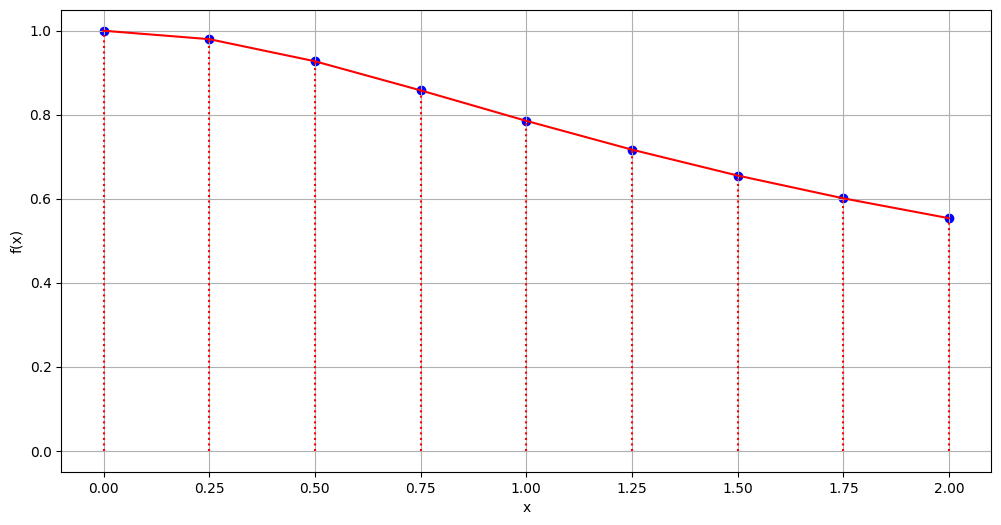

In [73]:
# Построение графика
plt.figure(figsize=(12, 6))

plt.plot(x, function, color = "red", linestyle='-', )

plt.scatter(x, function, color='blue')

for i in range(len(x)):
    plt.vlines(x[i], 0, function[i], colors='red', linestyles='dotted')


plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.savefig("Int.png")
plt.show()

In [57]:
# Классический метод трапеций
def trapezoidal_integral(x, y):
    sum = 0
    for i in range(len(x) - 1):
        sum += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return sum

In [59]:
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])
    
    return table[0, :]

In [60]:
def newton_polynomial(x, x_nodes, coefficients):
    n = len(coefficients)
    result = coefficients[0]
    product = 1.0
    for i in range(1, n):
        product *= (x - x_nodes[i - 1])
        result += coefficients[i] * product
    return result

In [61]:
def runge_rule(I_h2, I_h):
    
    return I_h2 + (I_h2 - I_h) / 3

In [62]:
def trapezoidal_integral_runge(x, y):
    coefficients = divided_differences(x, y)
    I_h = trapezoidal_integral(x, y)
    
    sum = 0
    
    for i in range(len(x) - 1):
        x_prom = (x[i] + x[i+1]) / 2
        y_prom = newton_polynomial(x_prom, x, coefficients)
        
        S1 = 0.5 * (y_prom + y[i]) * (x_prom - x[i])
        S2 = 0.5 * (y_prom + y[i+1]) * (x[i+1] - x_prom)
        
        sum += S1
        sum += S2
        
    I_h2 = sum
    
    return I_h2 + (I_h2 - I_h) / 3

In [70]:
def simpsons_integral(x, y):
    n = len(x) - 1  # Количество подотрезков
    
    h = (x[-1] - x[0]) / n  # Шаг разбиения
    integral = y[0] + y[-1]  # Первое и последнее значение функции

    # Суммируем 4 * f(x_i) для нечётных индексов
    for i in range(1, n, 2):
        integral += 4 * y[i]
    
    # Суммируем 2 * f(x_i) для чётных индексов
    for i in range(2, n, 2):
        integral += 2 * y[i]
    
    integral *= h / 3  # Умножаем на шаг / 3
    
    return integral

In [74]:
print(f"Значение вычисленное классическим методом трапеций {trapezoidal_integral(x, function)}")
print(f"Значение вычисленное с уточнением по правилу Рунге {trapezoidal_integral_runge(x, function)}")
print(f"Значение интеграла методом Симпсона: {simpsons_integral(x, function)}")

Значение вычисленное классическим методом трапеций 1.57509475
Значение вычисленное с уточнением по правилу Рунге 1.5760073457845052
Значение интеграла методом Симпсона: 1.5760136666666669


In [ ]:
# Функции для решения СЛАУ методом Гауса из прошлой лабы

#Вычисление третей нормы вектора
def norm_3(U):
    r = 0
    for i in range(len(U)):
        r += U[i,0] * U[i,0]
        
    return np.sqrt(r)

# поиск главного элемента в матрице
def find_main_element(A, iteration):
    size = A.shape[0]
    main_element = A[iteration,iteration]
    i_main = iteration
    j_main = iteration

    for i in range(size - iteration): 
        for j in range(size - iteration):
            if abs(A[i + iteration,j + iteration]) > abs(main_element):
                i_main = i + iteration
                j_main = j + iteration
                main_element = A[i_main,j_main]
    return [i_main, j_main]

# Функция для обмена строк
def swap_rows(A, i, j):
    A[[i, j], :] = A[[j, i], :]

# Функция для обмена столбцов
def swap_columns(A, i, j):
    A[:, [i, j]] = A[:, [j, i]]
    
#Функция для обмена значений
def swap(a,b):
    return b,a

def gauss(a, f):
    
    A = copy.deepcopy(a)
    F = copy.deepcopy(f)
    
    size = len(A)  # размеры матрицы - количество переменных Х
    
    X = np.arange(size) # массив для смены порядка переменных Х
        
    for iter in range(size): # прямой ход
        
        main_indices = find_main_element(A,iter) # поиск координат главного элемента
        main_element = A[main_indices[0], main_indices[1]] # главный элемент
        
        # если главный элемент не стоит в верхней строке, делаем перестановку строк
        if(main_indices[0] - iter != 0): 
            swap_rows(A[iter:, iter:], 0, main_indices[0] - iter)
            # swap(F[iter], F[main_indices[0]])
            F[iter] = F[main_indices[0]] + F[iter]
            F[main_indices[0]] = F[iter] - F[main_indices[0]]
            F[iter] = F[iter] - F[main_indices[0]]
            
            
        # если главный элемент не стоит в левом столбце,  делаем перестановку столбцов
        if(main_indices[1] - iter != 0): 
            swap_columns(A, iter, main_indices[1])
            # swap(X[iter], X[main_indices[1]])
            X[iter] = X[main_indices[1]] + X[iter]
            X[main_indices[1]] = X[iter] - X[main_indices[1]]
            X[iter] = X[iter] - X[main_indices[1]]
        
        # делим строчку на главный элемент
        if(main_element != 0):
            A[iter:, iter:][0] =  A[iter:, iter:][0] / main_element #
            F[iter] = F[iter] / main_element
        
        # вычитаем из всех строк первую домноженную на соответсвующий множитель
        for i in range(size - iter - 1):
            F[iter + i + 1] -= (F[iter]  * A[iter:, iter:][i + 1][0])
            A[iter:, iter:][i + 1] -= (A[iter:, iter:][0] * A[iter:, iter:][i + 1][0])

    # приводим правый нижний элемент к 1
    if(A[-1,-1] != 0):
        F[-1] /= A[-1, -1]
        A[size - 1, size - 1] = 1
 
    U  = np.ones((size, 1)) # массив для решений СЛАУ
    
    # обратный ход
    for i in range(size-1, -1, -1):
        U[i] = F[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    # перестановка переменных в изначальном порядке
    result = np.ones((size, 1))
    for i in range(size):
        result[int(X[i])][0] = U[i][0]

    # возвращаем результат
    return result